In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
olist_review = pd.read_csv('../data/olist_order_reviews_dataset.csv')
olist_review.loc[:,'review_creation_date'] = olist_review['review_creation_date'].astype('datetime64[ns]')
olist_review.set_index('review_creation_date', inplace = True)

In [14]:
reviews_count = olist_review[['review_score', 'review_id', 'review_comment_message']].groupby('review_score').count()

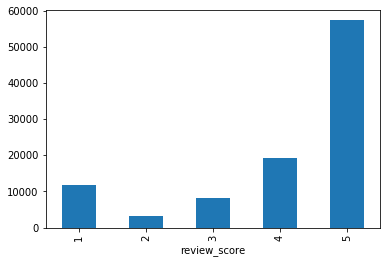

In [29]:
reviews_count['review_id'].plot.bar()

### 76.6 % das avaliações foram iguais ou maiores a 4

In [31]:
reviews_count['review_id']/reviews_count['review_id'].sum()

review_score
1    0.11858
2    0.03235
3    0.08287
4    0.19200
5    0.57420
Name: review_id, dtype: float64

In [32]:
0.192+0.5742

0.7662

### Ainda assim, a proporção de clientes que deixaram comentário é maior para clientes menos satisfeitos

Text(0.5, 1.0, 'Porcentagem de clientes que avaliaram que deixaram também um comentário, por score. ')

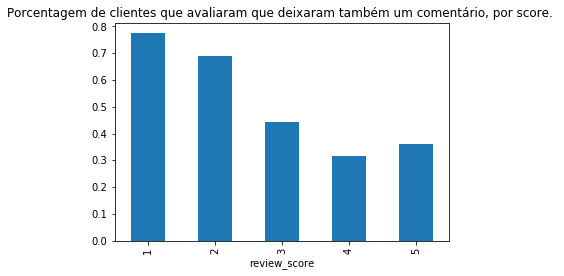

In [43]:
(reviews_count['review_comment_message']/reviews_count['review_id']).plot.bar()
plt.title('Porcentagem de clientes que avaliaram que deixaram também um comentário, por score. ')

### Quantidade de comentários por score ao longo do tempo

In [135]:
a = olist_review[['review_score','review_comment_message']].groupby([olist_review.index,'review_score']).count()
a = a.reset_index().set_index('review_creation_date')

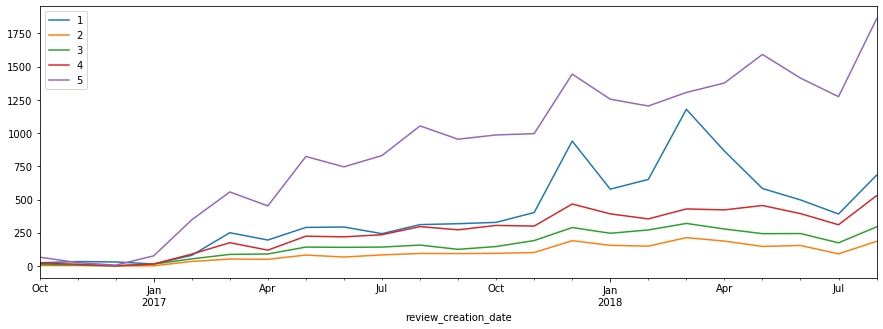

In [158]:
for i in [1,2,3,4,5]:
     ax = a[a['review_score'] == i]['review_comment_message'].resample('M').sum().plot(figsize=(15, 5))
     plt.legend('12345')
